In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
amypro = pd.read_csv('/novo/projects/departments/cdd/molecular_ai/mlbp/data/fibrillation_data/sbxw_fibrillation_peptide_waltzdb-train-val_amypro27-test_randpadded10x.csv')
amypro = amypro[amypro['dataset'] == 'amypro27']
labels_df = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/sbxw_files_2/tables/250217_amypro27_residues.csv')
ldf = labels_df[['name', 'res_value_bool', 'res_idx']]

In [82]:
amypro.head(4)

,Unnamed: 0,sequence,value_bool,data_split,dataset,mask,core_sequence,len,res_value_bool,name
13990,0,LPICPGGAARCQVTLRDLFDRAVVLSHYIHNLSSEMFSEFDKRYTH...,1,test,amypro27,not_available,NaN,199,0000001111111111111111111111111111000000001111...,Prolactin__AP00001
13991,1,KNTMEHVSSSEESIISQETYKQEKNMAINPSKENLCSTFCKEVVRN...,1,test,amypro27,not_available,NaN,207,0000000000000000000000000000000000000000000000...,Alpha-s2-casein__AP00004
13992,2,RSFFSFLGEAFDGARDMWRAYSDMREANYIGSDKYFHARGNYDAAK...,1,test,amypro27,not_available,NaN,104,1111111111111111111111111110000000000000000000...,Serum_Amyloid_A-1__AP00005
13993,3,RLDKQGNFNAWVAGSYGNDQWLQVDLGSSKEVTGIITQGARNFGSV...,1,test,amypro27,not_available,NaN,50,0000000000000000000000000000000111111111111111...,Medin__AP00018


In [93]:
bads = [' Medin__AP00018', ' Chaplin_H__AP00039', ' Chorion_class_A_protein_PC292__AP00046', ' Lysozyme_C__AP00016', ' PAPf39__AP00091']
df_cleaned = amypro[~amypro['name'].isin(bads)]
df_cleaned['dataset'] = 'amypro22'
df_cleaned = df_cleaned[['sequence', 'res_value_bool', 'name', 'len', 'dataset', 'data_split', 'value_bool']]
df_cleaned
df_cleaned.to_csv('/novo/projects/departments/cdd/public/users/ehec/au24/datasets/amypro22.csv')

/tmp/ipykernel_11063/460739550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dataset'] = 'amypro22'


In [95]:
bads = [' Medin__AP00018', ' Chaplin_H__AP00039', ' Chorion_class_A_protein_PC292__AP00046', ' Lysozyme_C__AP00016', ' PAPf39__AP00091']
df_cleaned2 = labels_df[~labels_df['name'].isin(bads)]
df_cleaned2.to_csv('/novo/projects/departments/cdd/public/users/ehec/au24/datasets/amypro22_residues.csv')

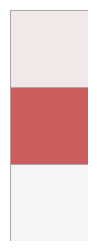

In [81]:
# Generate random data
data = np.random.rand(3, 1)

colors = ["indianred", "whitesmoke"]  # Define colors
cmap = LinearSegmentedColormap.from_list("blue_to_grey", colors)

# Create the heatmap
fig = plt.figure(figsize=(1, 3))
sns.heatmap(data, cmap=cmap, annot=False, fmt=".2f", cbar=False, linewidths=.55, linecolor='darkgrey', edgecolor='darkgrey')
plt.xticks([], [])  # Remove x-axis labels
plt.yticks([], [])  # Remove y-axis labels

# Display the heatmap
plt.show()
#fig.savefig('tensor5.png', dpi=600)